In [0]:
from fastai import *
from fastai.vision import *

In [19]:
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip 
!unzip HE_Challenge_data.zip > out

--2019-07-30 15:42:51--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.36.91
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.36.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip.1’

HE_Challenge_data.z 100%[===================>] 905.00M  15.0MB/s    in 62s     

2019-07-30 15:43:54 (14.5 MB/s) - ‘HE_Challenge_data.zip.1’ saved [948965311/948965311]

replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [20]:
from fastai import *
from fastai.vision import *

import pandas as pd
import numpy as np

path = Path('data'); path.ls()

[PosixPath('data/train'),
 PosixPath('data/test'),
 PosixPath('data/test.csv'),
 PosixPath('data/sample_submission.csv'),
 PosixPath('data/train.csv')]

In [37]:
train_df = pd.read_csv('data/train.csv')

train_df['image_id'] = train_df['image_id'].astype(str)+'.jpg'

train_df.head()

,image_id,category
0,0.jpg,77
1,1.jpg,81
2,2.jpg,52
3,3.jpg,72
4,4.jpg,58


In [0]:
tfms = get_transforms()

In [39]:
fnames = get_image_files('data/train')
fnames[:5]

[PosixPath('data/train/11648.jpg'),
 PosixPath('data/train/2057.jpg'),
 PosixPath('data/train/8574.jpg'),
 PosixPath('data/train/8845.jpg'),
 PosixPath('data/train/3660.jpg')]

In [0]:
data = (ImageDataBunch.from_df(
    'data/train',
    train_df,
    folder=None,
    seed=42,
    size=64
    ))

In [69]:
data.c

102

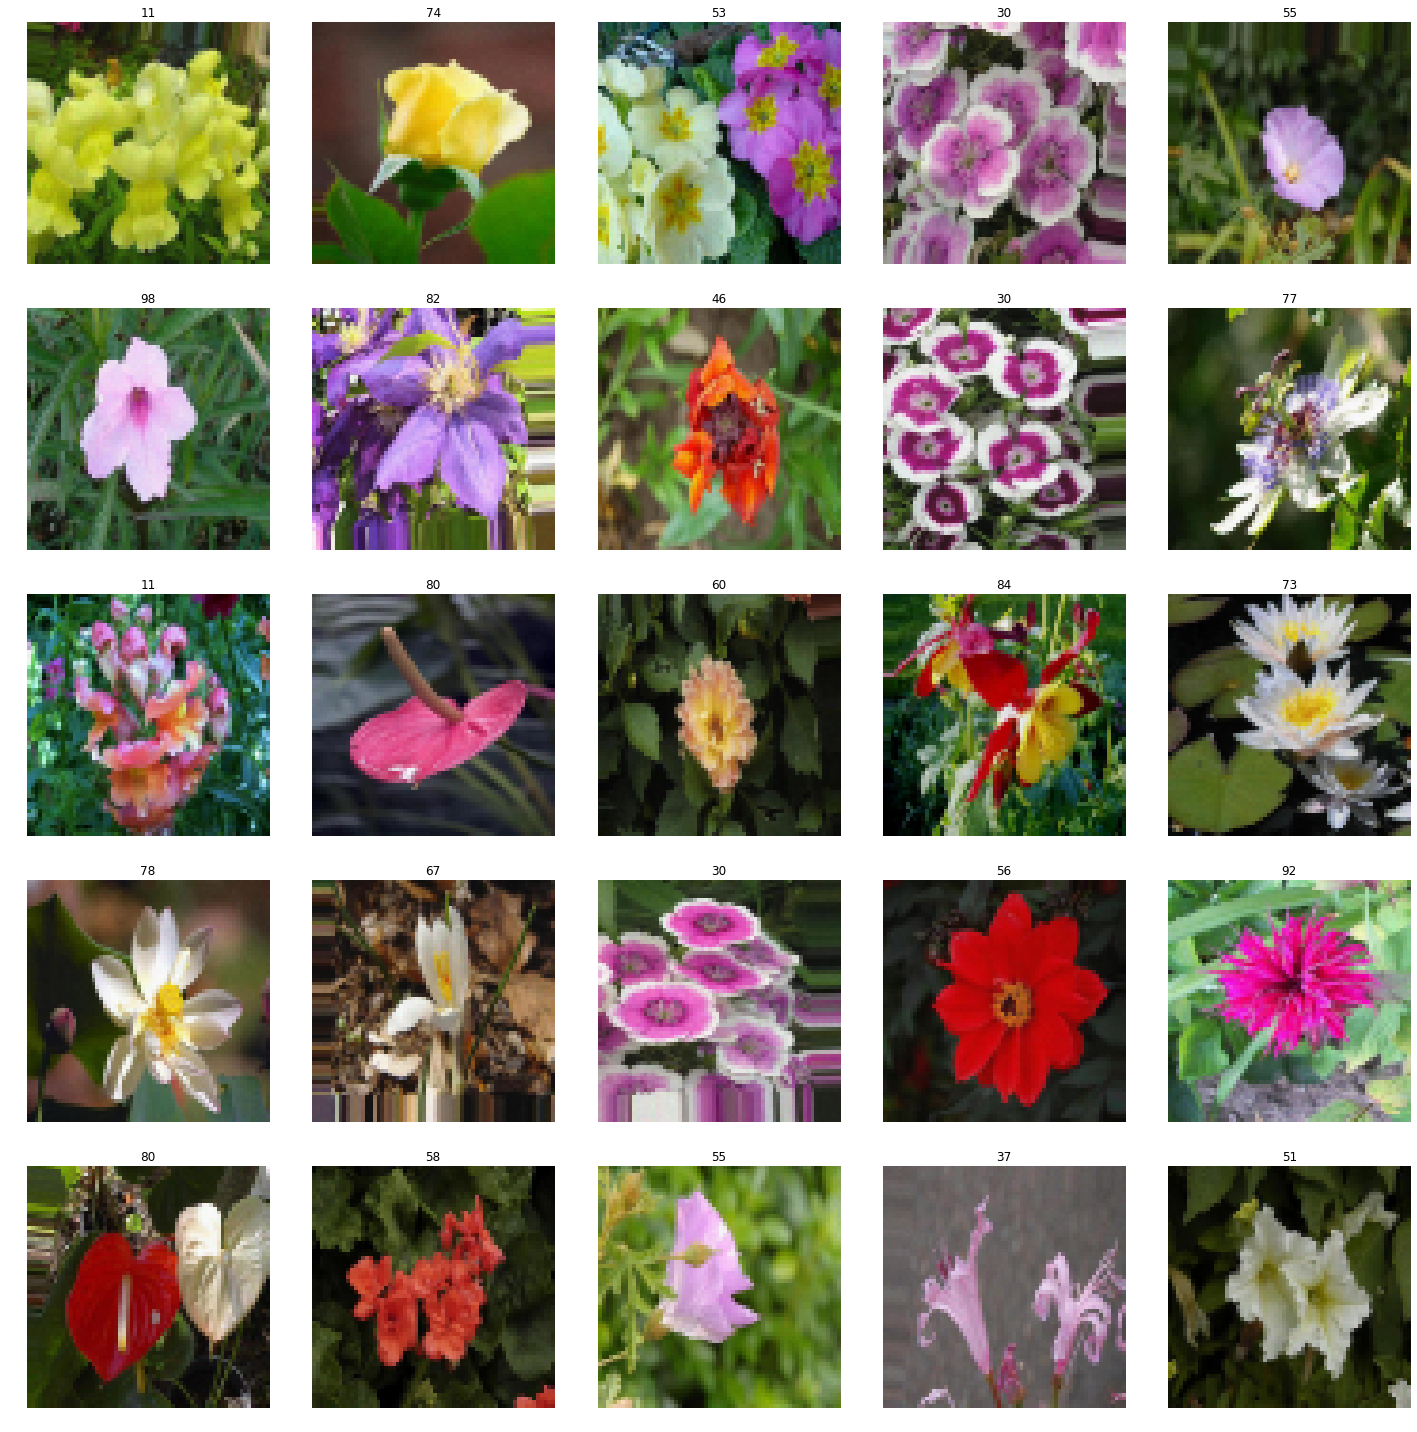

In [70]:
data.show_batch(row=3, fig=(5,5))

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
gdrive = Path('/content/drive/My Drive/garden')

In [0]:
learn = (cnn_learner(
    data = data, 
    base_arch = models.resnet34,
    metrics = [accuracy],
))

In [72]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


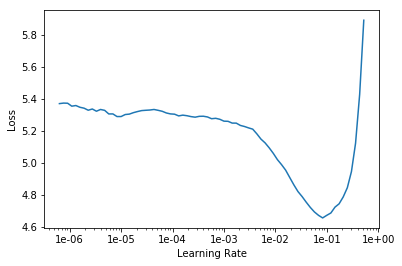

In [73]:
learn.recorder.plot()

In [74]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.862662,1.463881,0.604639,01:57
1,1.298506,1.130375,0.683657,01:54
2,0.847714,0.717676,0.789105,01:54
3,0.527117,0.361744,0.885922,01:53
4,0.326603,0.299569,0.907767,01:53


In [0]:
learn.save(gdrive/'stage1-64-resnet34.pth')

In [0]:
learn.load(gdrive/'stage1-64-resnet34.pth')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


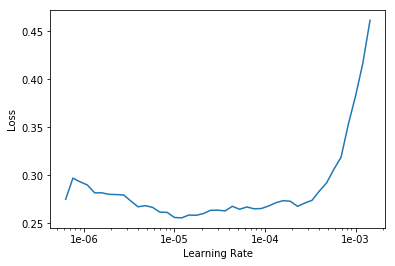

In [77]:
learn.lr_find()
learn.recorder.plot()

In [81]:
learn.fit_one_cycle(5, slice(1e-5,1e-3/10))

epoch,train_loss,valid_loss,accuracy,time
0,0.281226,0.272557,0.918554,01:53
1,0.233857,0.219187,0.934736,01:52
2,0.142671,0.182419,0.946332,01:53
3,0.083760,0.157296,0.953344,01:52
4,0.070833,0.158158,0.953883,01:53


In [0]:
learn.save(gdrive/'stage2-64-resnet34.pth')

In [0]:
learn.load(gdrive/'stage2-64-resnet34.pth')

In [0]:
tfms = get_transforms(
    do_flip=True, 
    flip_vert=False, 
    max_rotate=30.0, 
    max_zoom=1.4, 
    max_lighting=0.4, 
    max_warp=0.4, 
    p_affine=0.75, 
    p_lighting=0.75
)

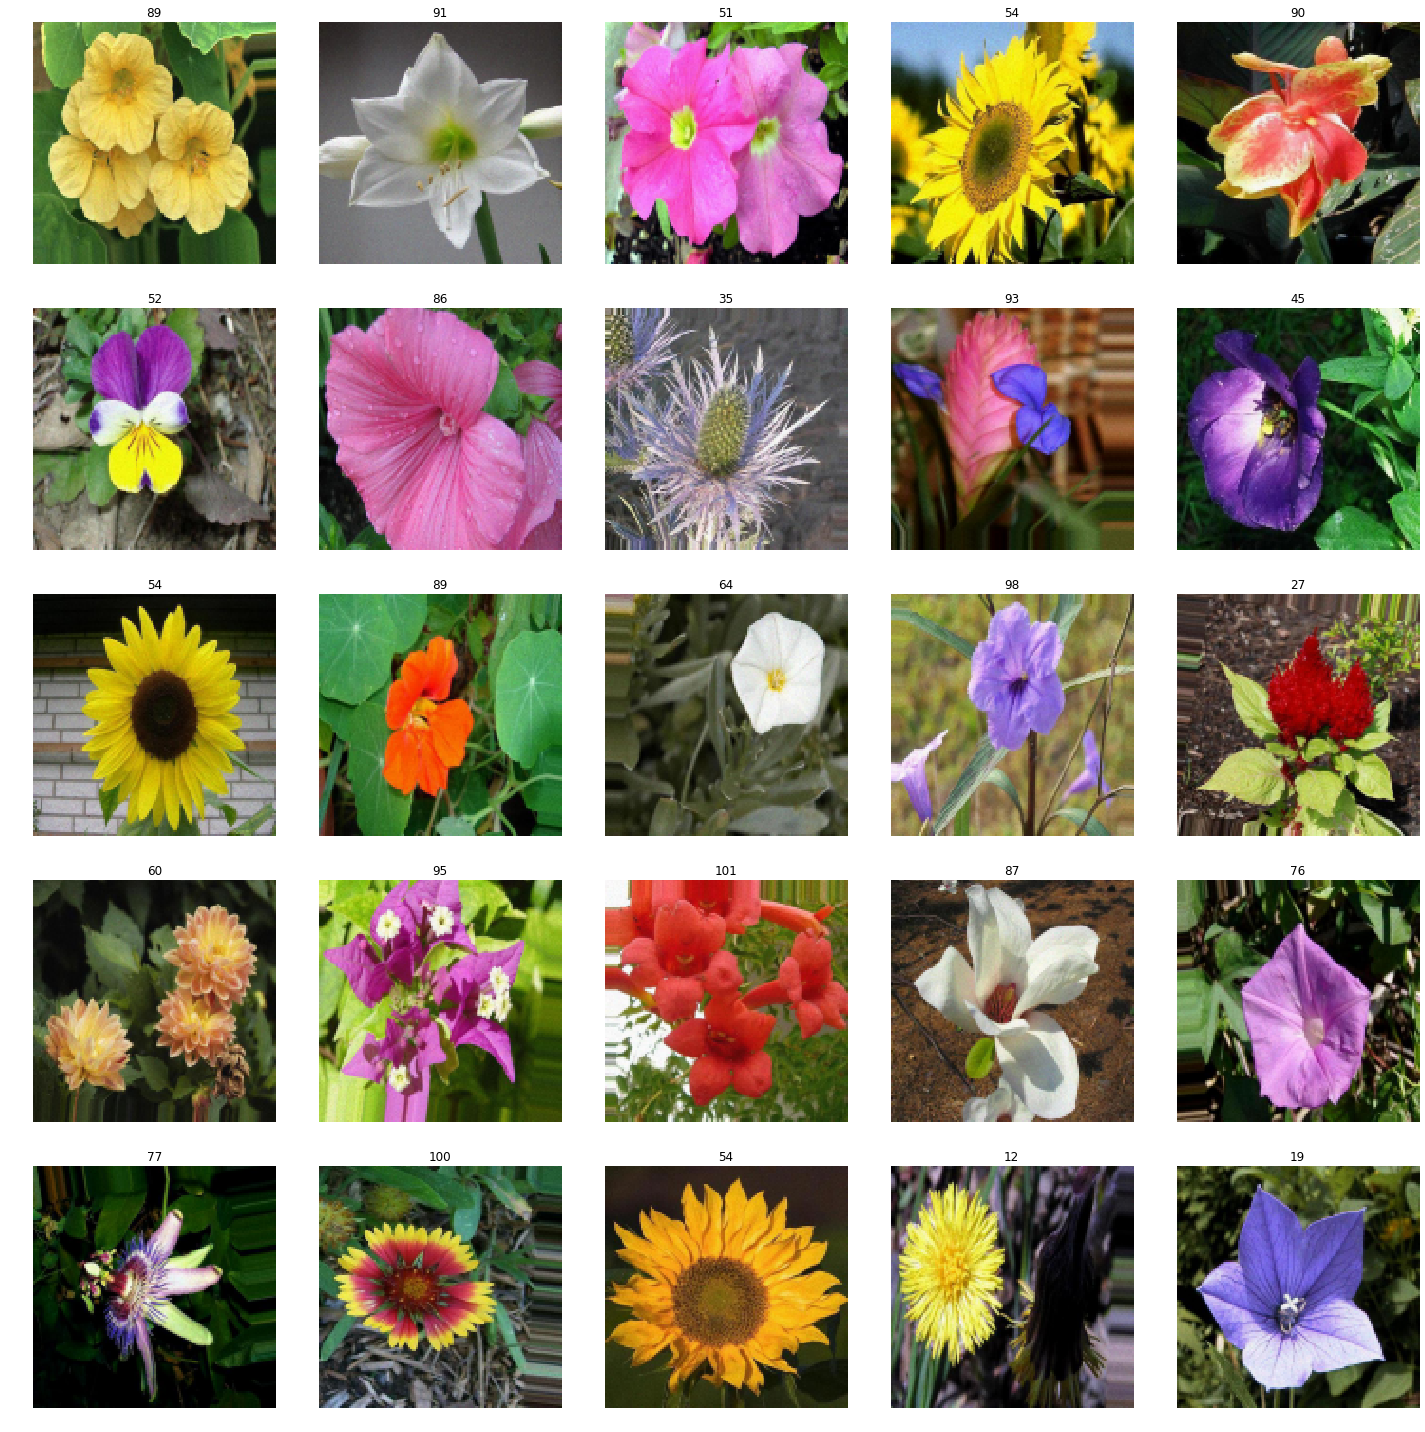

In [89]:
data_128 = (ImageDataBunch.from_df(
    'data/train',
    train_df,
    folder=None,
    seed=42,
    size=128
    ))

data_128.show_batch()

In [0]:
learn.data = data_128

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


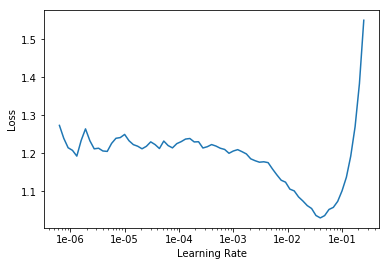

In [92]:
learn.lr_find()
learn.recorder.plot()

In [93]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.398728,0.409464,0.878101,02:39
1,0.497926,0.414692,0.879989,02:37
2,0.313171,0.232425,0.923679,02:35
3,0.147014,0.072932,0.978964,02:34
4,0.063719,0.052921,0.984088,02:34


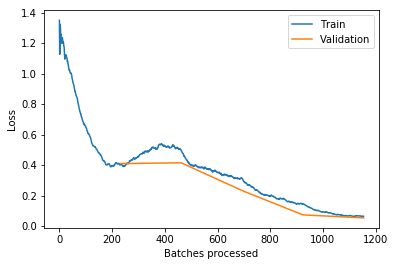

In [94]:
learn.recorder.plot_losses()

In [0]:
learn.save(gdrive/'stage1-128-resnet34-9840.pth')

In [0]:
learn.load(gdrive/'stage1-128-resnet34-9840.pth')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


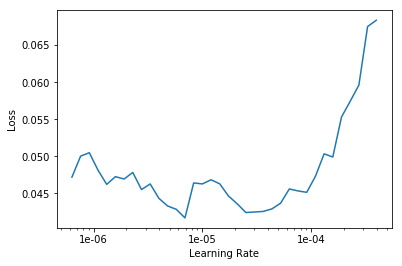

In [99]:
learn.lr_find()
learn.recorder.plot()

In [100]:
learn.fit_one_cycle(5, slice(1e-5,1e-3/20))

epoch,train_loss,valid_loss,accuracy,time
0,0.060304,0.047538,0.985707,02:35
1,0.057647,0.036521,0.990022,02:34
2,0.036784,0.031794,0.990561,02:34
3,0.024943,0.027473,0.991370,02:33
4,0.017378,0.027579,0.992179,02:33


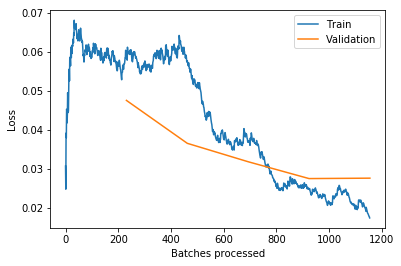

In [101]:
learn.recorder.plot_losses()

In [0]:
learn.save(gdrive/'stage2-128-resnet34-9921.pth')

In [0]:
learn.load(gdrive/'stage2-128-resnet34-9921.pth')

In [107]:
sample = pd.read_csv('data/sample_submission.csv')
sample.head()

,image_id,category
0,18540,0
1,18541,0
2,18542,0
3,18543,0
4,18544,0


In [111]:
test_df = pd.read_csv('data/test.csv')
test_df['image_id'] = test_df['image_id'].astype(str)+'.jpg'
test_df.head()

,image_id,category
0,18540.jpg,NaN
1,18541.jpg,NaN
2,18542.jpg,NaN
3,18543.jpg,NaN
4,18544.jpg,NaN


In [0]:
test_data = ImageList.from_df(test_df, path='/content/data/test')

In [0]:
learn.data.add_test(test_data)

In [0]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
a = preds[0]

In [147]:
results = preds.argmax(dim=1).numpy() + 1
results.shape

(2009,)

In [148]:
test_df.shape

(2009, 2)

In [149]:
output = pd.read_csv('data/test.csv')
output['category'] = results
output.head()

,image_id,category
0,18540,9
1,18541,40
2,18542,40
3,18543,72
4,18544,51


In [0]:
output.to_csv('/content/drive/My Drive/garden/20190730-resnet34-128x128-9921.csv',index=False)

In [153]:
tta_preds, tta_y = learn.TTA(ds_type=DatasetType.Test)

TypeError: ignored

In [0]:
output = pd.read_csv('data/test.csv')
output['category'] = results
output.head()